In [1]:
#Hands On Lesson 1 Part 2 Linear Regression in Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
heights = pd.read_csv('heights.csv')

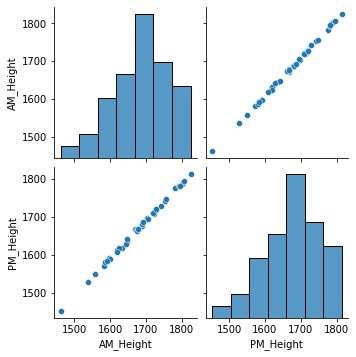

In [4]:
# test for linearity
sns.pairplot(heights)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM_Height', ylabel='Density'>

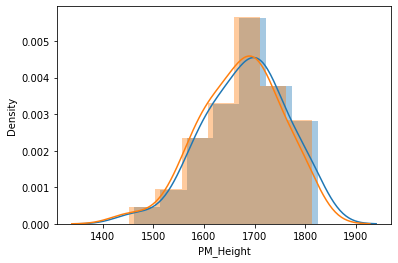

In [5]:
# plots appear to portray normality and linearity.
#To print a histogram with a curve on it to make it a bit clearer:
sns.distplot(heights['AM_Height'])
sns.distplot(heights['PM_Height'])

In [6]:
# Test for Homoscedasticity

x = heights['PM_Height']
y = heights['AM_Height']


In [7]:
# build the model
modelH = sm.OLS(y,x).fit()

In [9]:
#find and plot the residuals for the model
pred_val = modelH.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

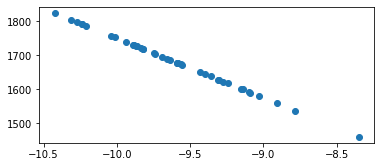

In [10]:
#graph and run statistical tests on the residuals

fig, ax = plt.subplots(figsize=(6,2.5))
_=ax.scatter(residual, pred_val)

In [13]:
#dots are in a linear line, which may show that there is homoscedasticity.
#double check this with BP stat:
sms.diagnostic.het_breuschpagan(residual, heights[['PM_Height']])

(40.914470252695494, nan, 19134.61528515104, 3.0569933958740838e-55)

In [ ]:
# The large F